<div align='center'>

# Lab03 - Logistic Regression (From Scratch)

<div/>

This lab aims to build a **Logistic Regression** model from scratch to predict the survival using the Titanic dataset.

This lab will perform the **EDA (Explanatory Data Analysis)** and try different optimization methods - Gradient Descent, Minibatch Gradient Descent (with and without Momentum), Adam.

The training and optimizations method in this lab will be done **from scratch**.

## 1. Load Neccessary Packages

Notebook Colors:


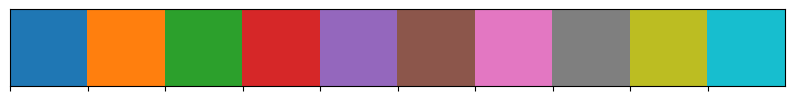

In [1]:
# Import the neccessary packages

import os 
import pandas as pd
from utils import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math

class clr:
    # Reset
    E = "\033[0m"
    # Colors
    R = "\033[91m"   # Red
    G = "\033[92m"   # Green
    Y = "\033[93m"   # Yellow
    B = "\033[94m"   # Blue
    M = "\033[95m"   # Magenta
    C = "\033[96m"   # Cyan
    W = "\033[97m"   # White

my_colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # yellow-green
    "#17becf"   # cyan
]

print(clr.G+'Notebook Colors:'+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

## 2. Load Dataset

In [2]:
# Use the load_dataset(file_path) from utils to load the dataset

try:
    df = load_dataset('Titanic-Dataset.csv')
    print(clr.G+'Dataset loaded successfully ✅!! Congratulations ✨'+clr.E, '\n\n')
except Exception as e:
    print(clr.R+f'Failed to load dataset ❌!!\nReason: {e}'+clr.E, '\n\n')

Dataset loaded successfully ✅!! Congratulations ✨ 




## 3. Explanatory Data Analysis

### 3.1 - View Data Important Information

In [3]:
# View the shape of the datset

print(f'Dataset shape (number of examples, number of features): {df.shape}', '\n\n')

Dataset shape (number of examples, number of features): (891, 12) 




In [4]:
# View dataset information

print(clr.G+f'Dataset information: \n\n'+clr.E, df.info, '\n\n')

Dataset information: 

 <bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..           

In [5]:
# View dataset description

print(clr.G+'Dataset Description:'+clr.E)
print(df.describe(), '\n\n')


Dataset Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   




In [6]:
## View some examples of the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 - Get the percentage of the value types 

We want to plot the percentage of value types so that we understand, how many types of data there are. Therefore, we can perform data transformation before fitting into the models.

<Axes: ylabel='count'>

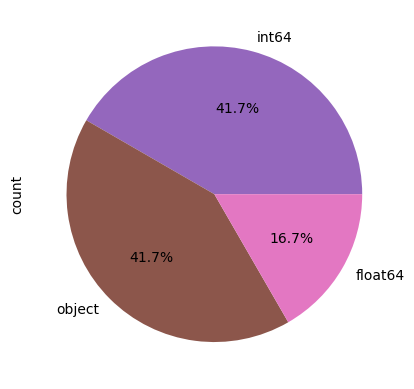

In [7]:
# Plot pie chart to observe the percentage of value types
df.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

=> There are 41.7% of values of type object, => Then we want to look at those features and think of the possible transformations for them.

### 3.3 - Solving missing data and data transformation in the dataset

In [8]:
# This function is used to check the missing values of the dataset

def check_missing(df):
    print(clr.G+'=== Missing Values Information ==='+clr.E)
    print(clr.G+"Total Missing Values: "+clr.E, df.isnull().sum().sum())
    print(clr.G+"Missing values for each features: \n"+clr.E, df.isnull().sum(), '\n\n')

In [9]:
# Check the missing values in the dataset
check_missing(df)

=== Missing Values Information ===
Total Missing Values:  866
Missing values for each features: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 




=> After checking, we notices that there are some missing values in the dataset, so we want to handle those missing values. Moreover, by checking the dataset information, we see that there are some categorical data, and we want to convert them to numerical.

In [10]:
# Convert 'sex' to numerical
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [11]:
# Handle missing values for Age using median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
# Handle missing values for Embarked
df['Embarked'] = df['Embarked'].fillna('S') # Filling missing values in Embarked with S

In [13]:
# Convert df['Embarked'] to numerical using get_dummies()
df = pd.get_dummies(df, columns=['Embarked'])

# Convert True/False values to 0/1
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

#### Extract "Name" columnn into "Title"

In [14]:
# extract Title from Name
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")  # everything between ',' and '.'

# Count frequencies of each title
title_counts = df["Title"].value_counts()
print(title_counts)

# Get the list of rare titles (which appears under 10 times)
rare_titles = title_counts[title_counts < 10].index

# Replace rare titles with 'Other'
df["Title"] = df["Title"].replace(rare_titles, "Other")
print(df["Title"].nunique())

# One-hot encode the title
df = pd.get_dummies(df, columns=["Title"], prefix="Title")

# Convert True/False values to 0/1
df['Title_Mrs'] = df['Title_Mrs'].astype(int)
df['Title_Mr'] = df['Title_Mr'].astype(int)
df['Title_Master'] = df['Title_Master'].astype(int)
df['Title_Other'] = df['Title_Other'].astype(int)
df['Title_Miss'] = df['Title_Miss'].astype(int)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
5


<Axes: ylabel='count'>

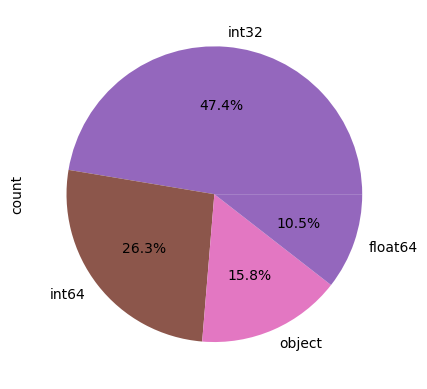

In [15]:
# Plot pie chart to observe the percentage of value types after being processed
df.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

=> After being processed, there is only 15.8% of data right now is of type object (those columns include **Cabin, Name, Ticket**).

1. For **Cabin**, there are too many missing values, so it is quite hard to fill in those missing values. Therefore, I won't include this column in training.
2. For **Name**, because I have extracted **Name** into **Title** columns, I will drop **Name** when training.
3. Finally for **Ticket**, there are many unique values of tickets (681), so it does not represent any patterns, which is not a valuable feature for training. Therefore, I will drop it when training.

### 3.4 - Checking the balance of labels in the dataset

We want to make sure that in the dataset, there is no high imbalance between the labels, in this dataset, the number of labels 0 and 1 must be balanced.

Text(0, 0.5, 'Counts')

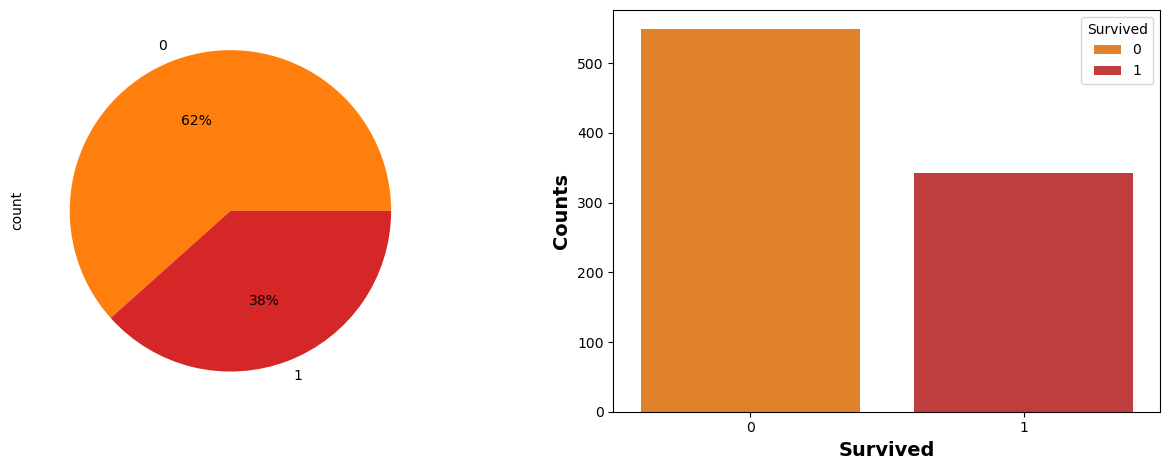

In [16]:
# We will first plot the number of survived and not_survived labels in bar and pie charts

plt.figure(figsize=(24, 24))
plt.subplot(4, 3, 1)
df['Survived'].value_counts().plot(kind='pie', autopct='%0.f%%', colors=[my_colors[1],my_colors[3]])
plt.subplot(4, 3, 2)
sns.countplot(data=df, x='Survived', hue='Survived', palette=[my_colors[1], my_colors[3]])
plt.xlabel('Survived', size=14, weight='bold')
plt.ylabel('Counts', size=14, weight='bold')

=> From the plots, we see that the labels **0** and **1** is not too imbalanced, so we will first keep it and do not perform any solution to this.

### 3.5 - Checking the correlation and collinearity

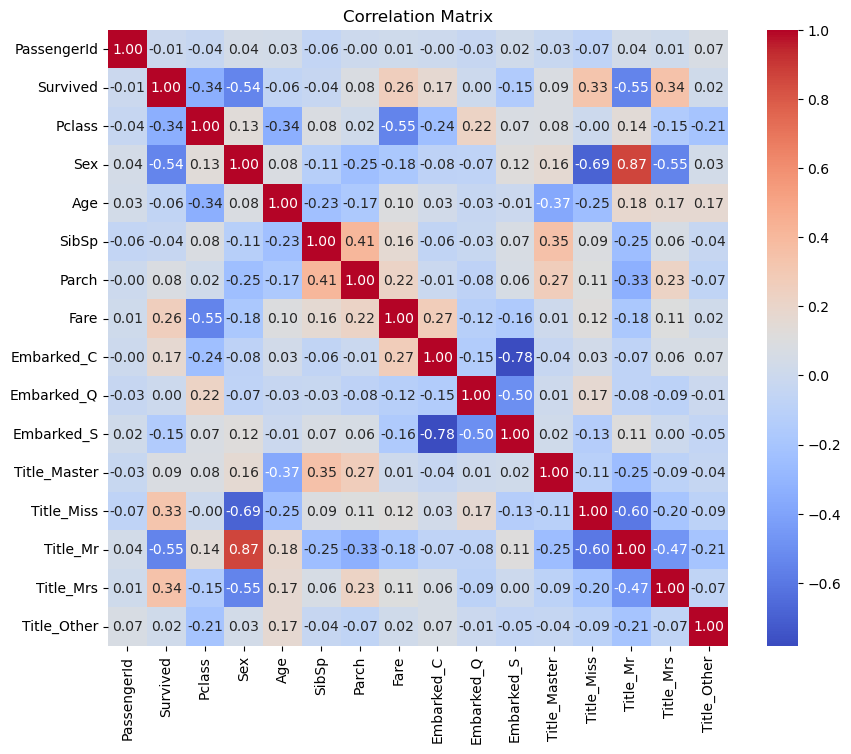

In [17]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# PLot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

=> From the correlation matrix, we see that the **SibSp** and **Parch** are quite correlated and they are all related to members in a family, so we will handle them by summing them and create a new feature. Moreover, the correlation betwen **Title_Mr** and **Sex** is high, so I will drop the column **Title_Mr**.

In [18]:
# Handle the correlation

df['FamilySize'] = df['SibSp'] + df['Parch']

## 4. Split Training and Testing Sets

### 4.1 - Split X and y

In [19]:
print(clr.G+"Number of unique values for Ticket -"+clr.E, df['Ticket'].nunique())

Number of unique values for Ticket - 681


In [20]:
# Drop the unncessary features

df_new = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Title_Mr'], axis=1)

<Axes: ylabel='count'>

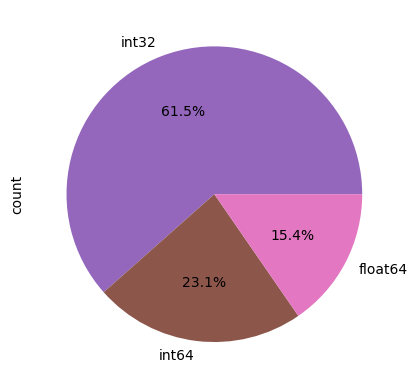

In [21]:
# Plot pie chart to make sure there is no object-type values

df_new.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

In [22]:
# Define X and y

X = df_new.drop(['Survived'], axis=1)
y = df_new['Survived']

### 4.2 - Split training set and test set


In [23]:
# Split the training and test set using train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 42
)

### 4.3 - Normalization

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div align='center'>

# A. GRADIENT DESCENT

<div/>

### Sigmoid function

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 5. Cost function

The cost function for logistic regression is defined as:
$$
loss(f_{w,b}(x^{(i)})) = - y^{(i)} \times \log(f_{w,b}(x^{(i)})) - (1 - y^{(i)}) \times \log(1 - f_{w,b}(x^{(i)}))
$$
$$
\mathcal{J}(w,b) = \frac{1}{m} \sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}))
$$

In [26]:
def compute_cost(X, y, w, b):
    '''
    Compute the cost of logistic regression

    Arguments:
    X - the input data (m, n)
    y - the labels (m, 1)
    w - the weights (n, 1)
    b - the bias (scalar)

    Returns:
    cost - the cost over all the training set
    '''
    m, _ = X.shape # Extract the shape

    # Computing the sigmoid function
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    # include epsilon to prevent dividing by 0
    eps = 1e-15
    f_wb = np.clip(f_wb, eps, 1 - eps)

    # Calculating the loss
    loss = - y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb) # (m, )
    cost = (1 / m) * np.sum(loss)
    
    return cost

## 6. Compute gradient

The partial derivatives of the cost function are defined as:
$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1}\sum_{j=0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

In [27]:
def compute_gradient(X, y, w, b):
    '''
    Compute the gradients dj_dw, dj_db

    Arguments:
    X - the input data (m, n)
    y - the labels (m, 1)
    w - the weights (n, 1)
    b - the bias (scalar)

    Returns:
    cost - the cost over all the training set
    '''
    m, n = X.shape # Extract the shape

    # calculate the sign
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    # include epsilon to prevent dividing by 0
    eps = 1e-15
    f_wb = np.clip(f_wb, eps, 1 - eps)

    # Computing the gradient
    err = (f_wb - y) # (m, )
    dj_dw = (1 / m) * np.dot(X.T, err)
    dj_db = (1 / m) * np.sum(err)

    return dj_dw, dj_db

## 7. Gradient Descent

In [28]:
# Create a function to perform gradient descent for logistic regression

def gradient_descent(X, y, w_init, b_init, cost_function, gradient_function, learning_rate=0.005, num_iterations=1000):
    '''
    Create a function to perform training for logistic regression

    Arguments:
    X - inputs in shape (m, n)
    y - labels in shape (m, 1)
    w_init - the initialized weights (n, 1)
    b_init - the initialized bias (scalar)
    cost_function - the function to compute the cost
    gradient_function - the function to compute gradients
    learning_rate - the learning rate when update the parameters

    Returns:
    w - the final weights (n, 1)
    b - the final bias (scalar)
    J_history - this history of the costs
    '''
    w = copy.deepcopy(w_init)
    b = b_init
    J_history = []

    for i in range(num_iterations):
        # compute the gradient
        dj_dw, dj_db = gradient_function(X, y, w, b)
    
        # update w, b
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

## 8. Predict

In [29]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    """
    # Linear function
    z = np.dot(X, w) + b
    
    # Sigmoid activation
    predicted_y = 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # prevent overflow
    
    # Apply threshold
    p = (predicted_y >= 0.5).astype(int)
    
    return p

Training with learning rate = 1e-05
Iteration    0: Cost     0.69   
Iteration  100: Cost     0.69   
Iteration  200: Cost     0.69   
Iteration  300: Cost     0.69   
Iteration  400: Cost     0.69   
Iteration  500: Cost     0.69   
Iteration  600: Cost     0.69   
Iteration  700: Cost     0.69   
Iteration  800: Cost     0.69   
Iteration  900: Cost     0.69   
Train Accuracy:  0.7823033707865169
Test Accuracy:  0.770949720670391


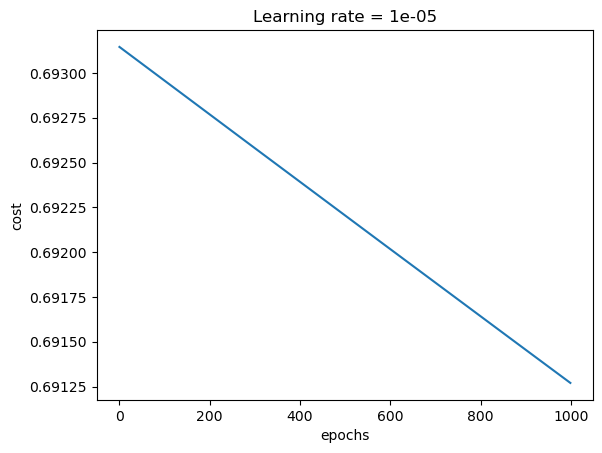


Training with learning rate = 5e-05
Iteration    0: Cost     0.69   
Iteration  100: Cost     0.69   
Iteration  200: Cost     0.69   
Iteration  300: Cost     0.69   
Iteration  400: Cost     0.69   
Iteration  500: Cost     0.69   
Iteration  600: Cost     0.69   
Iteration  700: Cost     0.69   
Iteration  800: Cost     0.69   
Iteration  900: Cost     0.68   
Train Accuracy:  0.7837078651685393
Test Accuracy:  0.770949720670391


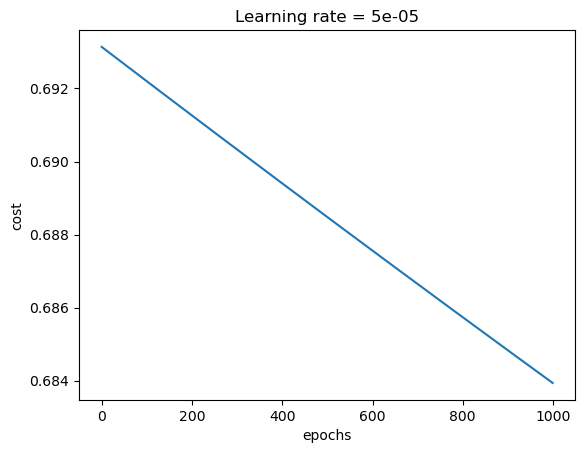


Training with learning rate = 0.0001
Iteration    0: Cost     0.69   
Iteration  100: Cost     0.69   
Iteration  200: Cost     0.69   
Iteration  300: Cost     0.69   
Iteration  400: Cost     0.69   
Iteration  500: Cost     0.68   
Iteration  600: Cost     0.68   
Iteration  700: Cost     0.68   
Iteration  800: Cost     0.68   
Iteration  900: Cost     0.68   
Train Accuracy:  0.7837078651685393
Test Accuracy:  0.770949720670391


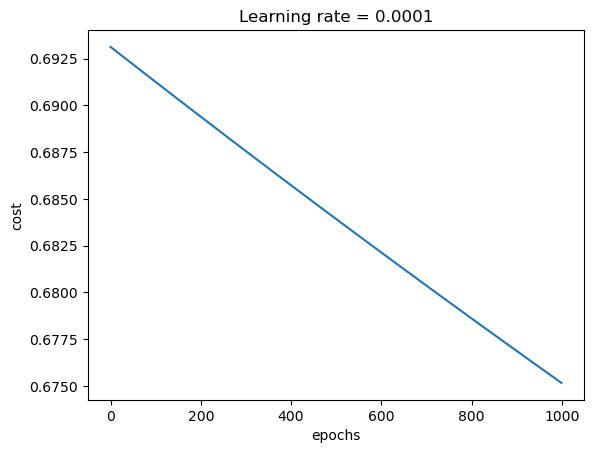


Training with learning rate = 0.0005
Iteration    0: Cost     0.69   
Iteration  100: Cost     0.68   
Iteration  200: Cost     0.68   
Iteration  300: Cost     0.67   
Iteration  400: Cost     0.66   
Iteration  500: Cost     0.65   
Iteration  600: Cost     0.64   
Iteration  700: Cost     0.64   
Iteration  800: Cost     0.63   
Iteration  900: Cost     0.62   
Train Accuracy:  0.7823033707865169
Test Accuracy:  0.7821229050279329


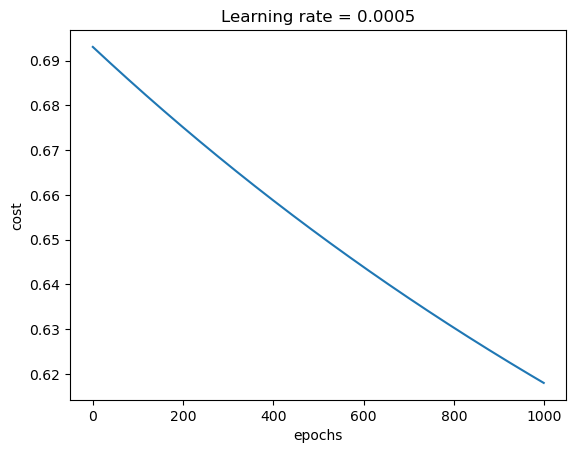


Training with learning rate = 0.001
Iteration    0: Cost     0.69   
Iteration  100: Cost     0.67   
Iteration  200: Cost     0.66   
Iteration  300: Cost     0.64   
Iteration  400: Cost     0.63   
Iteration  500: Cost     0.62   
Iteration  600: Cost     0.61   
Iteration  700: Cost     0.60   
Iteration  800: Cost     0.59   
Iteration  900: Cost     0.58   
Train Accuracy:  0.7837078651685393
Test Accuracy:  0.776536312849162


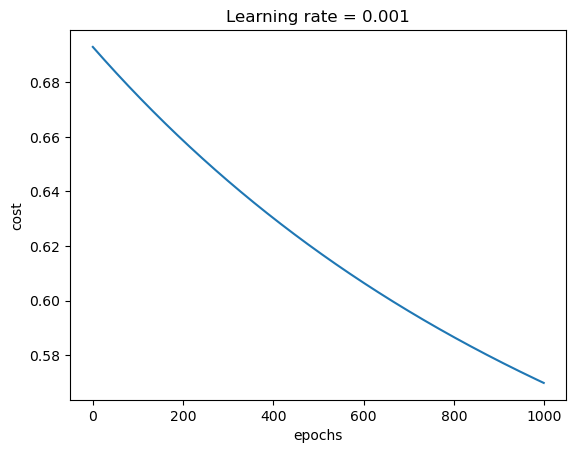


Training with learning rate = 0.005
Iteration    0: Cost     0.69   
Iteration  100: Cost     0.62   
Iteration  200: Cost     0.57   
Iteration  300: Cost     0.54   
Iteration  400: Cost     0.51   
Iteration  500: Cost     0.50   
Iteration  600: Cost     0.49   
Iteration  700: Cost     0.48   
Iteration  800: Cost     0.47   
Iteration  900: Cost     0.46   
Train Accuracy:  0.7963483146067416
Test Accuracy:  0.7877094972067039


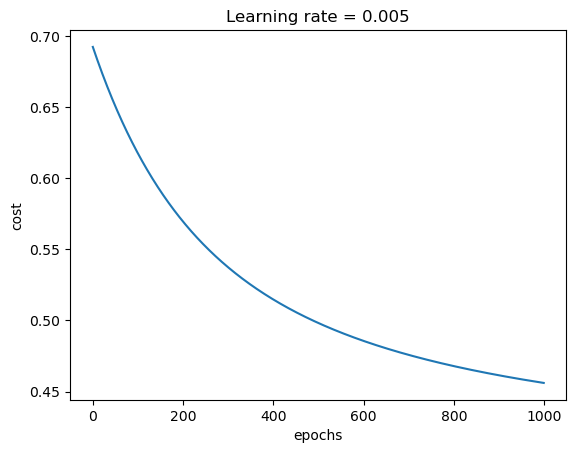

In [30]:
# TESTING GRADIENT DESCENT

learning_rates = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005]

# Loops through the list of learning_rates
for learning_rate in learning_rates:
    
    # Initialize weights and bias for training
    m, n = X.shape
    w_init = np.zeros(n)
    b_init = 0.0

    # Training
    print(clr.R+f'Training with learning rate = {learning_rate}'+clr.E)
    w, b, history = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, learning_rate=learning_rate, num_iterations=1000)

    predictions_train = predict(X_train, w, b)
    print('Train Accuracy: ', accuracy_score(y_train, predictions_train))

    predictions_test = predict(X_test, w, b)
    print('Test Accuracy: ', accuracy_score(y_test, predictions_test))

    # plot the cost
    plt.plot(history)
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    print()

<div align='center'>

# B. Mini-Batch GRADIENT DESCENT WITH MOMENTUM

<div/>

## 9. Mini-Batch Gradient Descent

When building a mini-batch gradient descent, there are two steps:
- **Shuffle**: Create a shuffled version of the training set (X,Y). Note that the random shuffling is done synchronously between X and Y, which means that after the shuffling, the $i^{(th)}$ column of X is the example corresponding to the $i^{(th)}$ label in Y. We need shuffling step because it ensures that examples will be split randomly into different batches.
  
- **Partition**: Then, we have to partition the shuffled (X,Y) into mini-batches of size `mini_batch_size`. Note that the training examples is not always divisible by `mini_batch_size`. The last mini batch might be smaller, but you don't need to worry about this.

### random_mini_batches

In [31]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    '''
    This function will create a list of random mini_batches from (X,Y)

    Arguments:
    X - input data of shape (m, n)
    Y - labels of shape (m, 1)
    mini_batch_size - the size of mini-batches
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    '''

    np.random.seed(seed)
    m = X.shape[0]
    mini_batches = []

    # Ensure X and Y are NumPy arrays
    if isinstance(X, (pd.DataFrame, pd.Series)):
        X = X.to_numpy()
    if isinstance(Y, (pd.DataFrame, pd.Series)):
        Y = Y.to_numpy()

    # Ensure Y is 2D
    Y = Y.reshape(-1, 1)

    # Step 1 : Shuffle
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :]
    
    inc = mini_batch_size

    # Step 2 : Partition
    num_complete_minibatches = math.floor(m / mini_batch_size) # Compute the number of complete mini batches
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*mini_batch_size : k*mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k*mini_batch_size : k*mini_batch_size + mini_batch_size, :]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end, where the mini batch < mini_batch_size
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches*mini_batch_size : m, :]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

## 10. Momentum

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will 'oscillate' toward convergence. Using momentum can solve this issue.

Momentum looks at the past gradients to smooth out the update.The 'direction' of the previous gradients is stored in the variable $v$. This will be the exponentially weighted average of the gradient on previous steps. You can think of $v$ as the 'velocity' of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill.

### a. initialize_velocity

In [32]:
def initialize_velocity(W, b):
    '''
    Initialize the velocity for logistic regression

    Arguments:
    W - weights of shape (1, n)
    b - bias scalar

    Returns:
    v - dictionary with dW and db
    '''

    v = {}
    v['dW'] = np.zeros_like(W)
    v['db'] = np.zeros_like(b)

    return v

### b. up_date_parameters_with_momentum

Implement the parameters update with momentum. The momentum update rule is:
$$ \begin{cases}
v_{dW} = \beta v_{dW} + (1 - \beta) dW \\
W = W - \alpha v_{dW}
\end{cases}$$

$$\begin{cases}
v_{db} = \beta v_{db} + (1 - \beta) db\ \\
b = b - \alpha v_{db} 
\end{cases}$$

where L is the number of layers, $\beta$ is the momentum and $\alpha$ is the learning rate. 

In [33]:
def update_parameters_with_momentum(W, b, dj_dw, dj_db, v, beta, learning_rate):
    '''
    Update parameters using Momentum
    
    Arguments:
    parameters -- dictionary containing your parameters:
                    parameters["W"], parameters["b"]
    grads -- dictionary containing your gradients:
                    grads["dW"], grads["db"]
    v -- dictionary containing the current velocities:
                    v["dW"], v["db"]
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """
    '''

    # Update the velocities 
    v['dW'] = beta * v['dW'] + (1 - beta) * dj_dw
    v['db'] = beta * v['db'] + (1 - beta) * dj_db

    # Update the parameters
    W = W - learning_rate * v['dW']
    b = b - learning_rate * v['db']

    return W, b, v

## 11. Adam

Adam is one of the most effective algorithms for training neural networks but we will now apply it to logistic regression. It combines the ideas from RMSProp and Momentum.

`How does Adam work?`
1. It calculates an exponentially weighted average of past gradients, and stores it in variables b (before bias correction) and $v^{corrected}$ (with bias correction).
2. It calculates an exponentially weighted average of the squares of the past gradietns and stores it in variable s (before bias correction) and $s^{corrected}$ (with bias correction).
3. It updates parameters in a direction based on combining information from '1' and '2'.
 
The update rule is:
$$\begin{cases}
v_{dW} = \beta_1 v_{dW} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W } \\
v^{corrected}_{dW} = \frac{v_{dW}}{1 - (\beta_1)^t} \\
s_{dW} = \beta_2 s_{dW} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W })^2 \\
s^{corrected}_{dW} = \frac{s_{dW}}{1 - (\beta_2)^t} \\
W = W- \alpha \frac{v^{corrected}_{dW}}{\sqrt{s^{corrected}_{dW}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

### a. initialize_adam

In [34]:
def initialize_adam(W, b):
    v = {}
    s = {}

    v['dW'] = np.zeros_like(W)
    v['db'] = np.zeros_like(b)
    s['dW'] = np.zeros_like(W)
    s['db'] = np.zeros_like(b)

    return v, s

### b. update_parameters_with_adam

Implement the parameters update with Adam. Recall the general update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW} = \beta_1 v_{dW} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W } \\
v^{corrected}_{dW} = \frac{v_{dW}}{1 - (\beta_1)^t} \\
s_{dW} = \beta_2 s_{dW} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W})^2 \\
s^{corrected}_{dW} = \frac{s_{dW}}{1 - (\beta_2)^t} \\
W = W - \alpha \frac{v^{corrected}_{dW}}{\sqrt{s^{corrected}_{dW}} + \varepsilon}
\end{cases}$$


In [35]:
def update_parameters_with_adam(W, b, dj_dw, dj_db, v, s, t, learning_rate=0.01, 
                                beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    '''
    Update parameters using Adam optimization algorithm

    Arguments:
    parameters --- python dictionary containing your parameters:
                    parameters['W'] = W
                    parameters['b'] = b
    grads --- python dictionary containing your gradients for each parameters:
                    grads['dW'] = dW
                    grads['db'] = db
    v --- Adam variable, moving average of the first gradient.
    s --- Adam variable, moving average of the squared gradient.
    t --- Adam variable, counts the number of steps taken for bias correction.
    learning_rate --- learning_rate, scalar
    beta1 --- exponential decay hyperparameter for the first moment estimates.
    beta2 --- exponential decay hyperparameter for the second moment estimates.

    Returns:
    parameters --- python dictionary containing your updateted parameters
    v --- updated Adam variable
    s --- updated Adam variable
    v_corrected --- python dictionary containing bias-corrected first moment estimates.
    s_corrected --- python dictionary containing bias-corrected second moment estimates.
    '''
    v_corrected = {}
    s_corrected = {}

    # Compute moving average of gradients
    v['dW'] = beta1 * v['dW'] + (1 - beta1) * dj_dw
    v['db'] = beta1 * v['db'] + (1 - beta1) * dj_db

    # Compute bias-corrected first moment estimates
    v_corrected['dW'] = v['dW'] / (1 - np.power(beta1, t))
    v_corrected['db'] = v['db'] / (1 - np.power(beta1, t))

    # Compute moving average of the squared gradients
    s['dW'] = beta2 * s['dW'] + (1 - beta2) * np.power(dj_dw, 2)
    s['db'] = beta2 * s['db'] + (1 - beta2) * np.power(dj_db, 2)

    # Compute bias-corrected second moment estimates
    s_corrected['dW'] = s['dW'] / (1 - np.power(beta2, t))
    s_corrected['db'] = s['db'] / (1 - np.power(beta2, t))

    # Update parameters
    W = W - learning_rate * (v_corrected['dW'] / (np.sqrt(s_corrected['dW']) + epsilon))
    b = b - learning_rate * (v_corrected['db'] / (np.sqrt(s_corrected['db']) + epsilon))

    return W, b, v, s, v_corrected, s_corrected

## 12. Create model

In [36]:
def model(X, y, optimizer, learning_rate=0.005, mini_batch_size=64, beta=0.9, beta1 = 0.9,
          beta2=0.999, epsilon=1e-8, num_epochs=5000, print_cost=True):
    '''
    2 logistic model running with 2 different optimizer modes.

    Arguments
    X --- input data (m, n)
    y --- true label vectore (m, 1)
    optimizer --- to optimizer chosen by the users
    learning_rate --- the learning_rate, scalar
    mini_batch_size --- the size of minibatch, scalar
    beta --- momentum hyperparameter
    beta1 --- exponential decay hyperparameter for the first moment estimates (Adam)
    beta2 --- exponential decay hyperparameter for the second moment estimates (Adam)
    epsilon --- hyperparameter preventing division by zero in Adam updates
    num_epoch --- number of epochs

    Returns:
    parameters --- pythondictionary containing upated parameters
    '''

    costs = []
    t = 0
    seed = 10
    m, n = X.shape

    # Initialze the parameters
    W = np.zeros((n, 1))
    b = 0

    # Initialize the optimizer
    if optimizer == 'momentum':
        v = initialize_velocity(W, b)
    elif optimizer == 'adam':
        v, s = initialize_adam(W, b)

    # Optimization loop
    for i in range(num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X, y, mini_batch_size, seed)
        cost_total = 0

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
             # Compute cost
            cost_total += compute_cost(minibatch_X, minibatch_Y, W, b)

            # Compute gradient 
            dj_dw, dj_db = compute_gradient(minibatch_X, minibatch_Y, W, b)

            # Update parameters
            if optimizer == 'momentum':
                W, b, v = update_parameters_with_momentum(W, b, dj_dw, dj_db, v, beta, learning_rate)
            elif optimizer == 'adam':
                t += 1 # Adam counter
                W, b, v, s, _, _ = update_parameters_with_adam(W, b, dj_dw, dj_db, v, s, t,
                                                         learning_rate, beta1, beta2, epsilon)
        cost_avg = cost_total / len(minibatches)

        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return W, b

## 13. Model Momentum

Cost after epoch 0: 0.692964
Cost after epoch 1000: 0.452485
Cost after epoch 2000: 0.416967
Cost after epoch 3000: 0.408683
Cost after epoch 4000: 0.410816


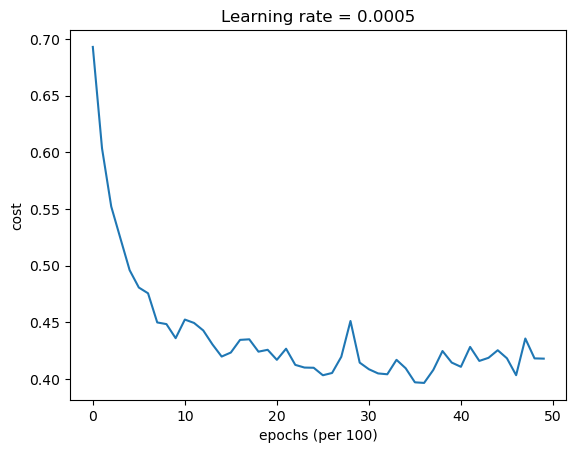

In [37]:
# Train model with momentum
W, b = model(X_train, y_train.values, learning_rate=0.0005,
             num_epochs=5000, beta=0.9, optimizer="momentum")

In [38]:
# Evaluation

# Training
predictions_train = predict(X_train, W, b)
print('Train Accuracy: ', accuracy_score(y_train, predictions_train))
print("Train Report:\n", classification_report(y_train, predictions_train))

# Testing
predictions_test = predict(X_test, W, b)
print('Test Accuracy: ', accuracy_score(y_test, predictions_test))
print("Test Report:\n", classification_report(y_test, predictions_test))

Train Accuracy:  0.8370786516853933
Train Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       444
           1       0.81      0.75      0.78       268

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.84      0.84      0.84       712

Test Accuracy:  0.8156424581005587
Test Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## 14. Model Adam

Cost after epoch 0: 0.644424


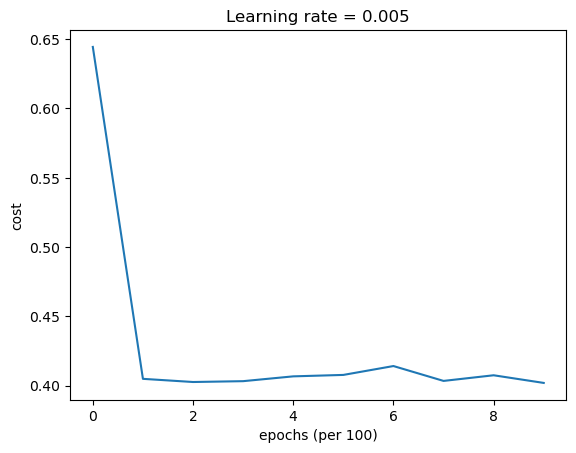

In [39]:
# Train model with Adam

W, b = model(X_train, y_train.values,
             learning_rate=0.005, num_epochs=1000,
             beta=0.9, mini_batch_size=32, optimizer="adam")

In [40]:
# Evaluation

# Training
predictions_train = predict(X_train, W, b)
print('Train Accuracy: ', accuracy_score(y_train, predictions_train))
print("Train Report:\n", classification_report(y_train, predictions_train))

# Testing
predictions_test = predict(X_test, W, b)
print('Test Accuracy: ', accuracy_score(y_test, predictions_test))
print("Test Report:\n", classification_report(y_test, predictions_test))

Train Accuracy:  0.8384831460674157
Train Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       444
           1       0.81      0.75      0.78       268

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

Test Accuracy:  0.8044692737430168
Test Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<div align='center'>

# C. Model with learning decay

<div/>

### a. Schedule Learning Decay

In [41]:
def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer.
    decay_rate -- Decay rate. Scalar.
    time_interval -- Number of epochs where you update the learning rate.

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    learning_rate = (1/(1 + decay_rate * math.floor(epoch_num/time_interval)))*learning_rate0
    
    return learning_rate

### b. Learning decay by epoch

In [42]:
def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer
    decay_rate -- Decay rate. Scalar

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    learning_rate = (1/(1 + decay_rate * epoch_num))*learning_rate0
    
    return learning_rate

### c. Model with learning decay

In [43]:
def model_lr_decay(X, y, optimizer, learning_rate=0.005, mini_batch_size=64, beta=0.9, beta1 = 0.9,
          beta2=0.999, epsilon=1e-8, num_epochs=5000, print_cost=True, decay=None, decay_rate=1):
    '''
    2 logistic model running with 2 different optimizer modes.

    Arguments
    X --- input data (m, n)
    y --- true label vectore (m, 1)
    optimizer --- to optimizer chosen by the users
    learning_rate --- the learning_rate, scalar
    mini_batch_size --- the size of minibatch, scalar
    beta --- momentum hyperparameter
    beta1 --- exponential decay hyperparameter for the first moment estimates (Adam)
    beta2 --- exponential decay hyperparameter for the second moment estimates (Adam)
    epsilon --- hyperparameter preventing division by zero in Adam updates
    num_epoch --- number of epochs

    Returns:
    parameters --- pythondictionary containing upated parameters
    '''

    costs = []
    t = 0
    seed = 10
    m, n = X.shape
    lr_rates = []
    learning_rate0 = learning_rate

    # Initialze the parameters
    W = np.zeros((n, 1))
    b = 0

    # Initialize the optimizer
    if optimizer == 'momentum':
        v = initialize_velocity(W, b)
    elif optimizer == 'adam':
        v, s = initialize_adam(W, b)

    # Optimization loop
    for i in range(num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X, y, mini_batch_size, seed)
        cost_total = 0

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
             # Compute cost
            cost_total += compute_cost(minibatch_X, minibatch_Y, W, b)

            # Compute gradient 
            dj_dw, dj_db = compute_gradient(minibatch_X, minibatch_Y, W, b)

            # Update parameters
            if optimizer == 'momentum':
                W, b, v = update_parameters_with_momentum(W, b, dj_dw, dj_db, v, beta, learning_rate)
            elif optimizer == 'adam':
                t += 1 # Adam counter
                W, b, v, s, _, _ = update_parameters_with_adam(W, b, dj_dw, dj_db, v, s, t,
                                                         learning_rate, beta1, beta2, epsilon)
        cost_avg = cost_total / len(minibatches)
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return W, b

### Momentum with learning decay

#### Schedule Learning Decay

Cost after epoch 0: 0.687967
learning rate after epoch 0: 0.005000
Cost after epoch 1000: 0.414728
learning rate after epoch 1000: 0.002500
Cost after epoch 2000: 0.407459
learning rate after epoch 2000: 0.001667
Cost after epoch 3000: 0.407306
learning rate after epoch 3000: 0.001250
Cost after epoch 4000: 0.408570
learning rate after epoch 4000: 0.001000


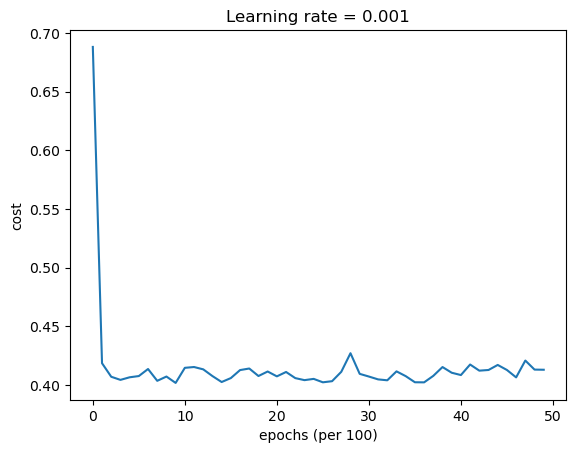

In [44]:
# Training
W, b = model_lr_decay(X_train, y_train.values,
             learning_rate=0.005, num_epochs=5000,
             beta=0.9, mini_batch_size=32, optimizer="momentum", decay=schedule_lr_decay)

In [45]:
# Evaluation

# Training
predictions_train = predict(X_train, W, b)
print('Train Accuracy: ', accuracy_score(y_train, predictions_train))
print("Train Report:\n", classification_report(y_train, predictions_train))

# Testing
predictions_test = predict(X_test, W, b)
print('Test Accuracy: ', accuracy_score(y_test, predictions_test))
print("Test Report:\n", classification_report(y_test, predictions_test))

Train Accuracy:  0.8384831460674157
Train Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       444
           1       0.81      0.75      0.78       268

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

Test Accuracy:  0.8100558659217877
Test Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Epoch Learning Decay

Cost after epoch 0: 0.687967
learning rate after epoch 0: 0.005000
Cost after epoch 1000: 0.575611
learning rate after epoch 1000: 0.000005
Cost after epoch 2000: 0.567693
learning rate after epoch 2000: 0.000002
Cost after epoch 3000: 0.563217
learning rate after epoch 3000: 0.000002
Cost after epoch 4000: 0.564091
learning rate after epoch 4000: 0.000001


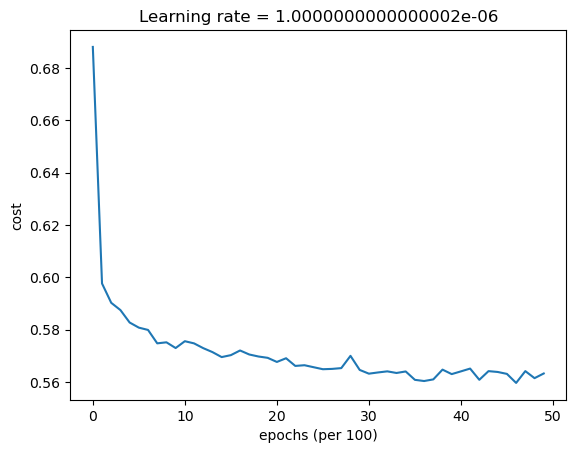

In [46]:
# Training
W, b = model_lr_decay(X_train, y_train.values,
             learning_rate=0.005, num_epochs=5000,
             beta=0.9, mini_batch_size=32, optimizer="momentum", decay=update_lr)

In [47]:
# Evaluation

# Training
predictions_train = predict(X_train, W, b)
print('Train Accuracy: ', accuracy_score(y_train, predictions_train))
print("Train Report:\n", classification_report(y_train, predictions_train))

# Testing
predictions_test = predict(X_test, W, b)
print('Test Accuracy: ', accuracy_score(y_test, predictions_test))
print("Test Report:\n", classification_report(y_test, predictions_test))

Train Accuracy:  0.7837078651685393
Train Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       444
           1       0.71      0.73      0.72       268

    accuracy                           0.78       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.79      0.78      0.78       712

Test Accuracy:  0.776536312849162
Test Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### Adam with learning decay

#### Schedule Learning Decay

Cost after epoch 0: 0.644424
learning rate after epoch 0: 0.005000
Cost after epoch 1000: 0.415219
learning rate after epoch 1000: 0.002500
Cost after epoch 2000: 0.407301
learning rate after epoch 2000: 0.001667
Cost after epoch 3000: 0.406764
learning rate after epoch 3000: 0.001250
Cost after epoch 4000: 0.408017
learning rate after epoch 4000: 0.001000


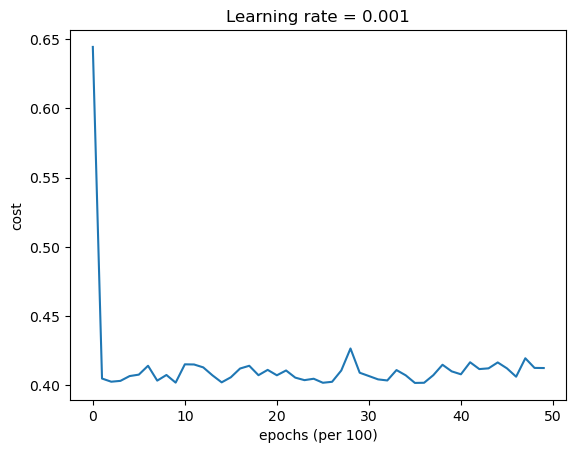

In [48]:
# Training
W, b = model_lr_decay(X_train, y_train.values,
             learning_rate=0.005, num_epochs=5000,
             beta=0.9, mini_batch_size=32, optimizer="adam", decay=schedule_lr_decay)

In [49]:
# Evaluation

# Training
predictions_train = predict(X_train, W, b)
print('Train Accuracy: ', accuracy_score(y_train, predictions_train))
print("Train Report:\n", classification_report(y_train, predictions_train))

# Testing
predictions_test = predict(X_test, W, b)
print('Test Accuracy: ', accuracy_score(y_test, predictions_test))
print("Test Report:\n", classification_report(y_test, predictions_test))

Train Accuracy:  0.8398876404494382
Train Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       444
           1       0.82      0.74      0.78       268

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

Test Accuracy:  0.8100558659217877
Test Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Epoch Learning Decay

Cost after epoch 0: 0.644424
learning rate after epoch 0: 0.005000


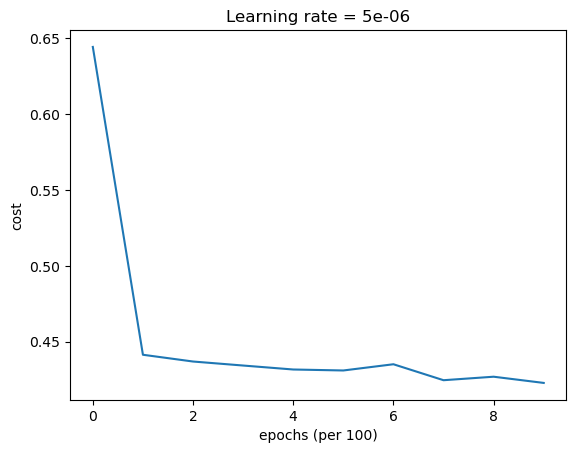

In [50]:
# Training
W, b = model_lr_decay(X_train, y_train.values,
             learning_rate=0.005, num_epochs=1000,
             beta=0.9, mini_batch_size=32, optimizer="adam", decay=update_lr)

In [51]:
# Evaluation

# Training
predictions_train = predict(X_train, W, b)
print('Train Accuracy: ', accuracy_score(y_train, predictions_train))
print("Train Report:\n", classification_report(y_train, predictions_train))

# Testing
predictions_test = predict(X_test, W, b)
print('Test Accuracy: ', accuracy_score(y_test, predictions_test))
print("Test Report:\n", classification_report(y_test, predictions_test))

Train Accuracy:  0.8286516853932584
Train Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       444
           1       0.79      0.74      0.76       268

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.83      0.83      0.83       712

Test Accuracy:  0.7877094972067039
Test Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

